In [1]:
import random as rd

Variant = 4
rd.seed(Variant)

Numbers_of_problems = [rd.sample(range(5),1)[0]+1, rd.sample(range(5),1)[0]+1, rd.sample(range(5),1)[0]+1]
Numbers_of_problems

[2, 3, 1]

Контрольный рубеж 1

## 1. Команды Linux

В каталоге **sandbox** находятся три файла: **Task_1, Task_2, Task_3**. Написать последовательность команд в командном интерпретаторе для получения следующих результатов.
1. Посмотреть объем файлов **Task_1, Task_2, Task_3** в Кб, изменить название файлов на **Task_first, Task_second, Task_third**. Дописать содержимое файла **Task_first** в конец файла **Task_third**.
2. Список всех выполняемых процессов переписать в файл Task_1. Создать в каталоге **sandbox** каталог **sandbox-2**, переместить туда файлы **Task_2, Task_3**. Переписать содержимое файла **/bin/ls** в файл **Task_2**, переименовав его в "**myls**", установить права доступа на файл "**myls**" - "**r-xr--r--**". Добавить в файл **Task_3** информацию о ядре системы.
3. В каталоге sandbox создать архив "**MyArch.tar**", добавив туда файлы **Task_1, Task_2, Task_3**, использовать утилиту **gzip** для сжатия архива. Перенаправить содержимое каталога **sandbox**, получаемое командой **ls** в файл **List**. Добавить файл **List** в архив.
4. В каталоге **sandbox** создать жесткую ссылку на файл **Task_1** и символическую ссылку на **Task_2**. Получить подробный отчет о содержимом текущего каталога и направить его в файл **Task_3**.
5. Создать в каталоге sandbox каталог tmp, скопировать туда все файлы из каталога **/bin**, название которых начинается на символ "**l**". Записать к файл **Task_1** количество файлов в каталоге **tmp**. 

*Случайно сделал два пункта, вместо одного, поэтому внизу приложено решение сразу двух пунктов*

Пусть даны следующие исходные файлы:

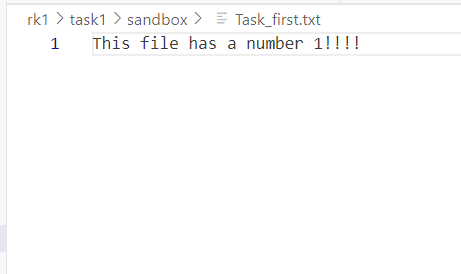

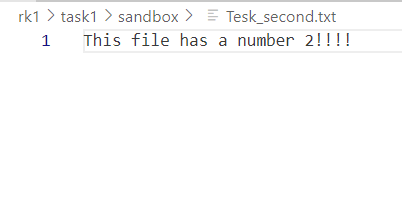

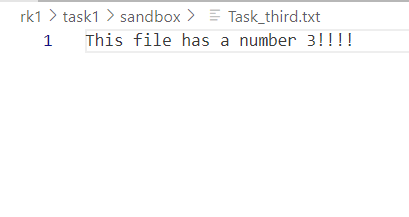

# Решение

Task 1

Посморим объем файлов

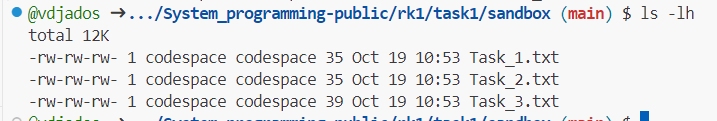

Переименуем файлы:

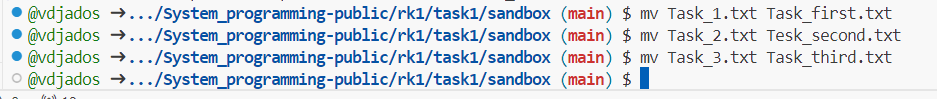

Допишем 1 файл к третьему

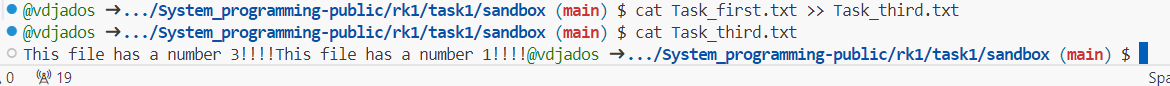

Task 2

Выведем в файл 1 все выполняемые процессы:
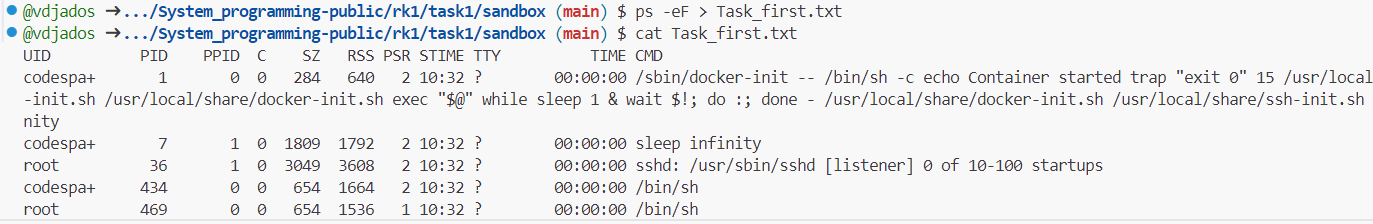

Создаем sandbox-2

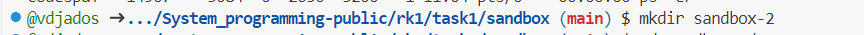

Перемещаем туда 2 и 3 файлы

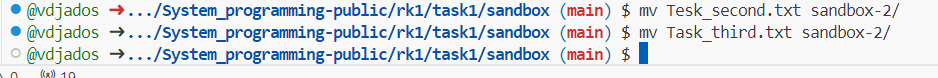

теперь переменстим соддержимое bin/ls в файл 2:

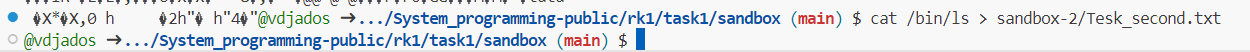

Переименуем второй файл:

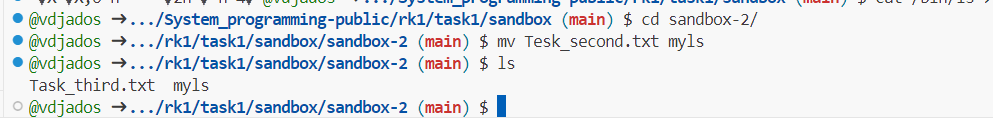

Изменим права доступа на myls:

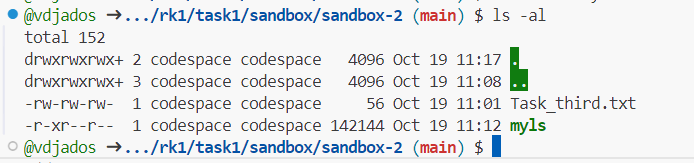

И теперь в трейтий файл выведем информацию о ядре системы:

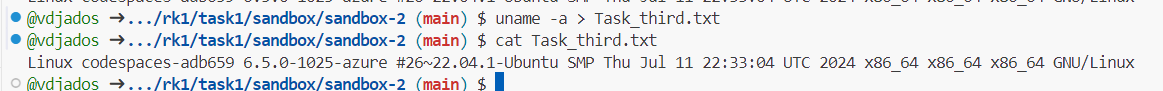

## 2. Вычислительные задачи

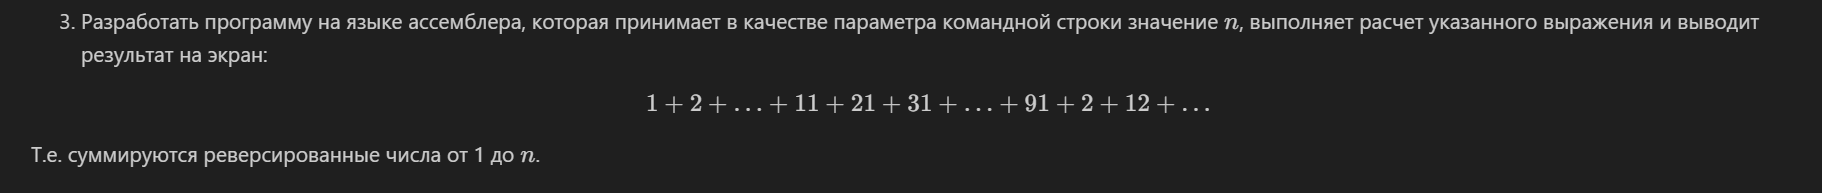

# Решение

main.asm

In [ ]:
format ELF64
public _start
public calcuate_sum

include 'help.asm'
include 'calcuator.asm'

section '.bss' writable
    place rb 255
    answer rb 2
    
section '.text' executable
_start:
    mov rsi, place
    call input_keyboard
    call str_number
    call calcuate_sum
    mov rax, rdi
    mov rsi, answer
    call number_str
    call print_str
    call new_line
    call exit

calcuator.asm

In [ ]:
calcuate_sum:
    push rax           ; Сохранить rax
    push rbx           ; Сохранить rbx
    push rcx           ; Сохранить rcx
    mov rbx, rax       ; Начальное значение N в rbx
    xor rdi, rdi       ; Инициализация суммы (rdi)

.loop:
    mov rax, rbx       ; Копировать текущее значение rbx в rax
    call reverse_digits ; Реверсировать цифры в rax
    add rdi, rax       ; Добавить результат к сумме
    dec rbx            ; Уменьшить rbx на 1
    jnz .loop          ; Повторять, пока rbx не станет 0

    pop rcx            ; Восстановить rcx
    pop rbx            ; Восстановить rbx
    pop rax            ; Восстановить rax
    ret                ; Вернуться из функции


reverse_digits:
    push rbx
    push rcx
    push rdi
    xor rcx, rcx       ; Обнуляем rcx для подсчета количества цифр
.push_digits:
    xor rdx, rdx       ; Обнуляем rdx перед делением
    mov rdi, 10        ; Делим на 10
    div rdi             ; rax = rax / 10, rdx = остаток (последняя цифра)
    push rdx           ; Сохраняем последнюю цифру на стеке
    inc rcx            ; Увеличиваем счетчик цифр
    xor rdx, rdx
    test rax, rax      ; Проверяем, не стало ли rax нулем
    jnz .push_digits    ; Если не ноль, продолжаем извлекать цифры
    mov rdi, 0
    mov rbx, rcx
.pop_digits:
    
    pop rax            ; Извлекаем цифру из стека
    push rcx
    push rbx
    sub rbx, rcx
    mov rcx, rbx
    pop rbx
    mov rdi, 10        ; Умножаем на 10
    push rdx

.loop_multiply:
    test rcx, rcx      ; Проверяем, остались ли еще цифры
    jz .main_loop       ; Если нет, переходим к главному циклу
    mul rdi            ; Умножаем rax на 10
    dec rcx            ; Уменьшаем счетчик цифр
    jmp .loop_multiply  ; Повторяем для следующей позиции

.main_loop:
    pop rdx
    add rdx, rax
    pop rcx
    dec rcx
    jnz .pop_digits    ; Если остались, продолжаем извлекать цифрыъ
    mov rax, rdx
    pop rdi
    pop rcx
    pop rbx
    ret                 ; Возврат из функции

help.asm

In [ ]:
exit:
     mov rax, 60
     mov rdi, 0
     syscall

;Function printing of string
;input rsi - place of memory of begin string
print_str:
    push rax
    push rdi
    push rdx
    push rcx
    mov rax, rsi
    call len_str
    mov rdx, rax
    mov rax, 1
    mov rdi, 1
    syscall
    pop rcx
    pop rdx
    pop rdi
    pop rax
    ret

;The function makes new line
new_line:
   push rax
   push rdi
   push rsi
   push rdx
   push rcx
   mov rax, 0xA
   push rax
   mov rdi, 1
   mov rsi, rsp
   mov rdx, 1
   mov rax, 1
   syscall
   pop rax
   pop rcx
   pop rdx
   pop rsi
   pop rdi
   pop rax
   ret


;The function finds the length of a string
;input rax - place of memory of begin string
;output rax - length of the string
len_str:
  push rdx
  mov rdx, rax
  .iter:
      cmp byte [rax], 0
      je .next
      inc rax
      jmp .iter
  .next:
     sub rax, rdx
     pop rdx
     ret


;Function converting the string to the number
;input rsi - place of memory of begin string
;output rax - the number from the string
str_number:
    push rcx
    push rbx

    xor rax,rax
    xor rcx,rcx
.loop:
    xor     rbx, rbx
    mov     bl, byte [rsi+rcx]
    cmp     bl, 48
    jl      .finished
    cmp     bl, 57
    jg      .finished

    sub     bl, 48
    add     rax, rbx
    mov     rbx, 10
    mul     rbx
    inc     rcx
    jmp     .loop

.finished:
    cmp     rcx, 0
    je      .restore
    mov     rbx, 10
    div     rbx

.restore:
    pop rbx
    pop rcx
    ret

;The function converts the nubmer to string
;input rax - number
;rsi -address of begin of string
number_str:
  push rbx
  push rcx
  push rdx
  xor rcx, rcx
  mov rbx, 10
  .loop_1:
    xor rdx, rdx
    div rbx
    add rdx, 48
    push rdx
    inc rcx
    cmp rax, 0
    jne .loop_1
  xor rdx, rdx
  .loop_2:
    pop rax
    mov byte [rsi+rdx], al
    inc rdx
    dec rcx
    cmp rcx, 0
  jne .loop_2
  mov byte [rsi+rdx], 0   
  pop rdx
  pop rcx
  pop rbx
  ret


;The function realizates user input from the keyboard
;input: rsi - place of memory saved input string 
input_keyboard:
  push rax
  push rdi
  push rdx

  mov rax, 0
  mov rdi, 0
  mov rdx, 255
  syscall

  xor rcx, rcx
  .loop:
     mov al, [rsi+rcx]
     inc rcx
     cmp rax, 0x0A
     jne .loop
  dec rcx
  mov byte [rsi+rcx], 0
  
  pop rdx
  pop rdi
  pop rax
  ret

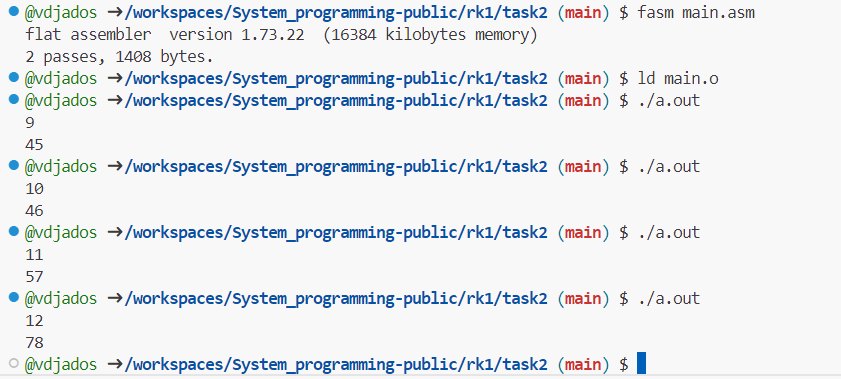